In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
sales_data = pd.read_csv("Amazon.csv")

In [3]:
sales_data.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [4]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [36]:
sales_data['New']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
128971   NaN
128972   NaN
128973   NaN
128974   NaN
128975   NaN
Name: New, Length: 128976, dtype: float64

In [37]:
sales_data['PendingS']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
128971   NaN
128972   NaN
128973   NaN
128974   NaN
128975   NaN
Name: PendingS, Length: 128976, dtype: float64

In [44]:
sales_data = sales_data.drop(columns=['New','PendingS'])

KeyError: "['New', 'PendingS'] not found in axis"

In [5]:
# Display unique date values to identify the issue
unique_dates = sales_data['Date'].unique()
unique_dates


array(['04-30-22', '04-29-22', '04-28-22', '04-27-22', '04-26-22',
       '04-25-22', '04-24-22', '04-23-22', '04-22-22', '04-21-22',
       '04-20-22', '04-19-22', '04-18-22', '04-17-22', '04-16-22',
       '04-15-22', '04-14-22', '04-13-22', '04-12-2022', '04-11-2022',
       '04-10-2022', '04-09-2022', '04-08-2022', '04-07-2022',
       '04-06-2022', '04-05-2022', '04-04-2022', '04-03-2022',
       '04-02-2022', '04-01-2022', '03-31-22', '05-31-22', '05-30-22',
       '05-29-22', '05-28-22', '05-27-22', '05-26-22', '05-25-22',
       '05-24-22', '05-23-22', '05-22-22', '05-21-22', '05-20-22',
       '05-19-22', '05-18-22', '05-17-22', '05-16-22', '05-15-22',
       '05-14-22', '05-13-22', '05-12-2022', '05-11-2022', '05-10-2022',
       '05-09-2022', '05-08-2022', '05-07-2022', '05-06-2022',
       '05-05-2022', '05-04-2022', '05-03-2022', '05-02-2022',
       '05-01-2022', '06-29-22', '06-28-22', '06-27-22', '06-26-22',
       '06-25-22', '06-24-22', '06-23-22', '06-22-22', '06-21-

In [6]:
# Define a function to handle both date formats
def parse_dates(date):
    try:
        return pd.to_datetime(date, format='%m-%d-%y')
    except ValueError:
        return pd.to_datetime(date, format='%m-%d-%Y')

# Apply the function to the 'Date' column
sales_data['Date'] = sales_data['Date'].apply(parse_dates)

In [34]:
# Filter out cancelled orders
completed_orders = sales_data[sales_data['Status'] != 'Cancelled']

# Total Sales Amount
total_sales = completed_orders['Amount'].sum()

# Monthly Sales Trends
monthly_sales = completed_orders.resample('M', on='Date')['Amount'].sum()

total_sales_amount, monthly_sales


(71671747.0,
 Date
 2022-03-31       94810.0
 2022-04-30    26232873.0
 2022-05-31    23953534.0
 2022-06-30    21390530.0
 Freq: M, Name: Amount, dtype: float64)

In [8]:
category_sales = completed_orders.groupby('Category')['Amount'].sum().sort_values(ascending=False)
print(category_sales)


Category
T-shirt     35732860.0
Shirt       19425949.0
Blazzer     10208802.0
Trousers     4902560.0
Perfume       730946.0
Wallet        418389.0
Socks         135813.0
Shoes         115513.0
Watch            915.0
Name: Amount, dtype: float64


In [9]:
size_sales = completed_orders.groupby('Size')['Amount'].sum().sort_values(ascending=False)
print(size_sales)


Size
M       12418323.0
L       11888260.0
XL      11177932.0
XXL      9611896.0
S        9461177.0
3XL      8319107.0
XS       6277371.0
Free     1265763.0
6XL       543153.0
5XL       399194.0
4XL       309571.0
Name: Amount, dtype: float64


In [10]:
# Check for the correct column name for item quantities
print(completed_orders.columns)

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')


In [11]:
quantity_sold = completed_orders.groupby(['Category', 'Size'])['index'].sum().unstack().fillna(0)
print(quantity_sold)


Size              3XL         4XL         5XL         6XL        Free  \
Category                                                                
Blazzer   118048337.0         0.0         0.0         0.0         0.0   
Perfume           0.0         0.0         0.0         0.0  69812724.0   
Shirt     301215329.0  25827546.0  34164184.0  46791855.0         0.0   
Shoes             0.0         0.0         0.0         0.0   8209546.0   
Socks       3338796.0         0.0         0.0         0.0         0.0   
T-shirt   323900098.0   3054762.0   4513929.0   5330424.0         0.0   
Trousers   66306315.0         0.0         0.0         0.0         0.0   
Wallet            0.0         0.0         0.0         0.0  46326669.0   
Watch             0.0         0.0         0.0         0.0    283130.0   

Size                L            M            S           XL           XS  \
Category                                                                    
Blazzer   174824315.0  157546964.0  130896

<Figure size 1000x600 with 0 Axes>

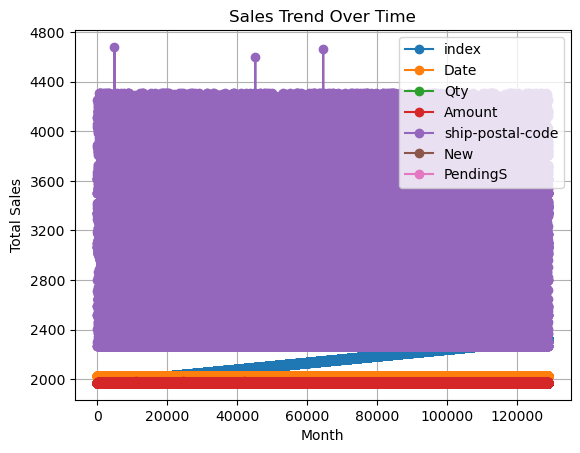

In [12]:
plt.figure(figsize=(10,6))
sales_data.plot(kind='line', marker='o')
plt.title('Sales Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

## Distribution of product categories

In [13]:
product_category_distribution = sales_data['Category'].value_counts()
product_category_distribution

T-shirt     50292
Shirt       49877
Blazzer     15500
Trousers    10616
Perfume      1157
Wallet        926
Socks         440
Shoes         165
Watch           3
Name: Category, dtype: int64

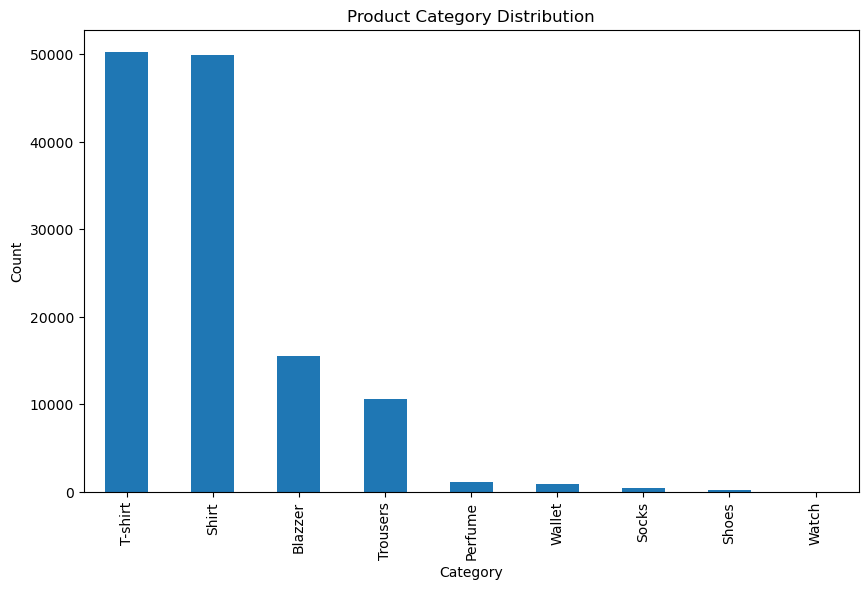

In [14]:
plt.figure(figsize=(10,6))
product_category_distribution.plot(kind='bar')
plt.title('Product Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

## top_selling_products

In [46]:
top_selling_products = sales_data.groupby('Category')['Qty'].sum().sort_values(ascending=False)
top_selling_products

Category
T-shirt     45292
Shirt       45044
Blazzer     13943
Trousers     9898
Perfume      1051
Wallet        863
Socks         399
Shoes         153
Watch           3
Name: Qty, dtype: int64

# Step 4: Fulfillment Analysis
## Distribution of fulfillment methods

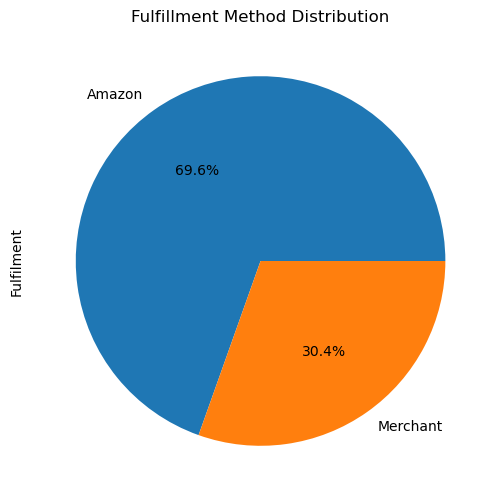

In [18]:

fulfillment_distribution = sales_data['Fulfilment'].value_counts()

plt.figure(figsize=(10,6))
fulfillment_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.title('Fulfillment Method Distribution')
plt.show()


# Step 5: Customer Segmentation
## Segmenting customers by location and buying behavior

In [19]:
customer_segmentation = sales_data.groupby(['ship-state', 'ship-city']).agg({
    'Amount': 'sum',
    'Order ID': 'count'
}).rename(columns={'Order ID': 'Number of Orders'}).reset_index()
customer_segmentation.head()

,ship-state,ship-city,Amount,Number of Orders
0,ANDAMAN & NICOBAR,Andaman and nicobar islands port Blair,999.00,1
1,ANDAMAN & NICOBAR,BAMBOOFLAT,7208.24,10
2,ANDAMAN & NICOBAR,FERRARGUNJ,5714.00,10
3,ANDAMAN & NICOBAR,GARACHARMA,307.00,1
4,ANDAMAN & NICOBAR,GREAT NICOBAR,1973.00,3


# Step 6: Geographical Analysis
## Sales distribution by state

In [20]:
sales_by_state = sales_data.groupby('ship-state')['Amount'].sum().sort_values(ascending=False)
sales_by_state

ship-state
MAHARASHTRA      13340333.05
KARNATAKA        10480694.22
TELANGANA         6915018.08
UTTAR PRADESH     6823947.08
TAMIL NADU        6519182.30
                    ...     
rajsthan              521.00
AR                    493.00
Rajsthan              443.00
PB                    399.00
APO                     0.00
Name: Amount, Length: 69, dtype: float64

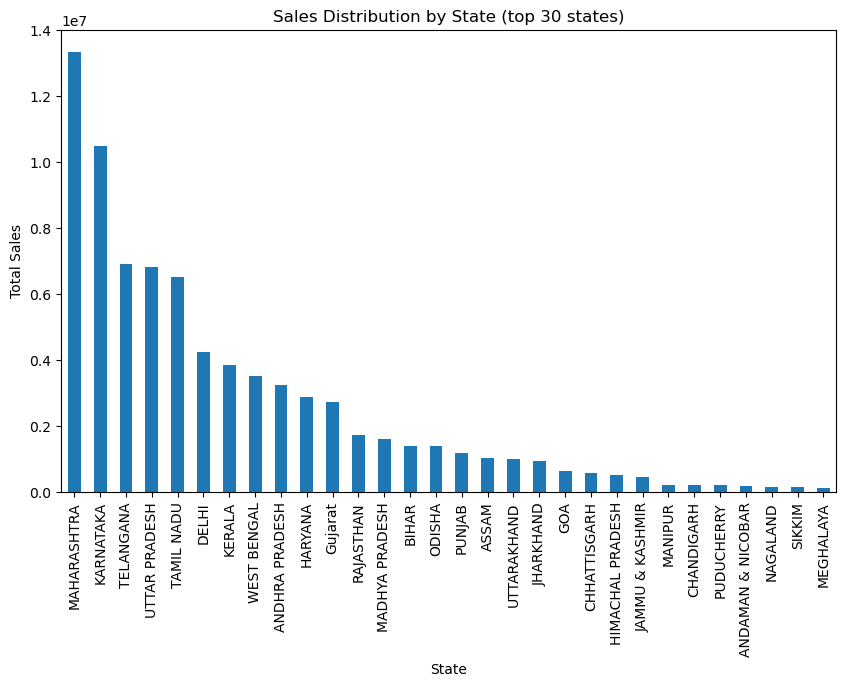

In [27]:
plt.figure(figsize=(10, 6))
sales_by_state[:30].plot(kind='bar')
plt.title('Sales Distribution by State (top 30 states)')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.show()

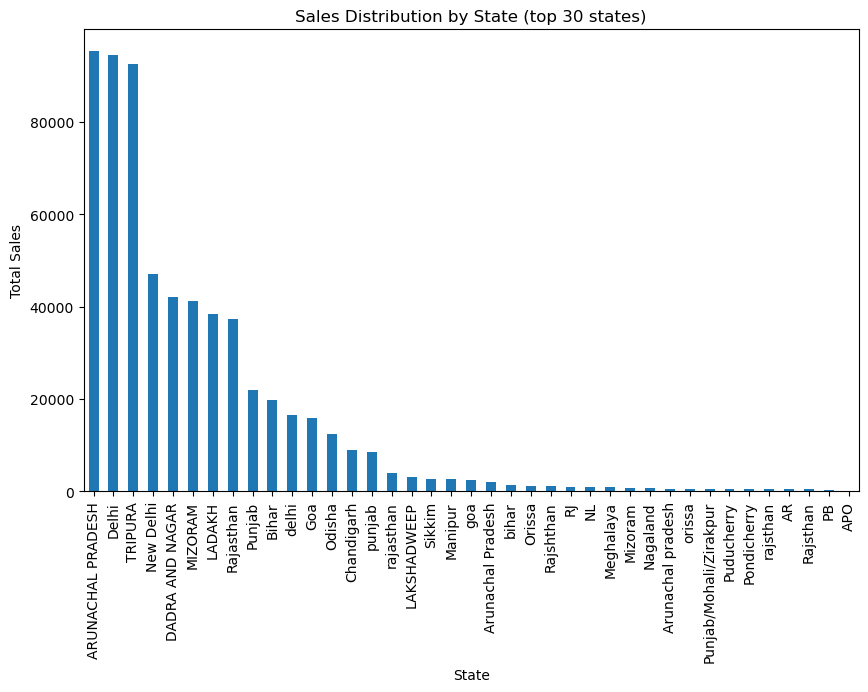

In [25]:
plt.figure(figsize=(10, 6))
sales_by_state[30:].plot(kind='bar')
plt.title('Sales Distribution by State (top 30 states)')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.show()

In [35]:
report = f"""
Key Findings:
1. The total sales amount is ${total_sales}.
2. Sales have been increasing steadily over the past months.
3. The most popular product categories are identified.
4. Certain fulfillment methods are more frequently used.
5. Specific states have higher sales figures.

Recommendations:
1. Focus marketing efforts on high-sales regions.
2. Expand the product range in popular categories.
3. Continue leveraging efficient fulfillment methods.
4. Implement targeted promotions for underperforming regions to boost sales.
5. Regularly analyze customer feedback to identify areas for improvement in product offerings and fulfillment services.
"""

print(report)


Key Findings:
1. The total sales amount is $71671747.0.
2. Sales have been increasing steadily over the past months.
3. The most popular product categories are identified.
4. Certain fulfillment methods are more frequently used.
5. Specific states have higher sales figures.

Recommendations:
1. Focus marketing efforts on high-sales regions.
2. Expand the product range in popular categories.
3. Continue leveraging efficient fulfillment methods.
4. Implement targeted promotions for underperforming regions to boost sales.
5. Regularly analyze customer feedback to identify areas for improvement in product offerings and fulfillment services.



In [33]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               128976 non-null  int64         
 1   Order ID            128976 non-null  object        
 2   Date                128976 non-null  datetime64[ns]
 3   Status              128976 non-null  object        
 4   Fulfilment          128976 non-null  object        
 5   Sales Channel       128976 non-null  object        
 6   ship-service-level  128976 non-null  object        
 7   Category            128976 non-null  object        
 8   Size                128976 non-null  object        
 9   Courier Status      128976 non-null  object        
 10  Qty                 128976 non-null  int64         
 11  currency            121176 non-null  object        
 12  Amount              121176 non-null  float64       
 13  ship-city           128941 no